In [287]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from deap import base, creator, tools, algorithms

import keras

import torch
import torch.nn as nn
import math

import matplotlib.pyplot as plt

In [288]:
# Cargar el conjunto de datos de CIFAR-10
#x = torch.linspace(-math.pi, math.pi, 2000)
#y = x * x 

# Preprocesar los datos
x_train = torch.linspace(-math.pi, math.pi, 2000).numpy()
x_test = torch.linspace(-math.pi, math.pi, 2000).numpy()
y_train = x_train*x_train
y_test = x_test*x_test

In [289]:
# Define la estructura de la red neuronal
def create_model(parameters):
    model = Sequential()
    model.add(Dense(parameters[0], activation='relu', input_shape=(1,)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

In [290]:
model_1 = create_model([4])

In [291]:
model_1.layers[0].set_weights(
    [ torch.asarray([[6,8,2,4]]), torch.asarray([2,2,2,2]) ]
    )

In [292]:
model_1.layers[1].set_weights(
    [ torch.asarray([[6],[8],[2],[4]]), torch.asarray([6]) ]
)

In [293]:
model_1.layers[0].weights

[<tf.Variable 'dense_1280/kernel:0' shape=(1, 4) dtype=float32, numpy=array([[6., 8., 2., 4.]], dtype=float32)>,
 <tf.Variable 'dense_1280/bias:0' shape=(4,) dtype=float32, numpy=array([2., 2., 2., 2.], dtype=float32)>]

In [294]:
model_1.layers[1].weights

[<tf.Variable 'dense_1281/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[6.],
        [8.],
        [2.],
        [4.]], dtype=float32)>,
 <tf.Variable 'dense_1281/bias:0' shape=(1,) dtype=float32, numpy=array([6.], dtype=float32)>]

In [295]:
loss, accuracy  = model_1.evaluate(x_test, y_test)

63/63 [==============================] - 1s 13ms/step - loss: 32422.8594 - accuracy: 0.0000e+00


In [296]:
def create_model(parameters):
    model = Sequential()
    model.add(Dense(4, activation='relu', input_shape=(1,)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

    model_1.layers[0].set_weights(
        [ torch.asarray([[parameters[0],parameters[1],parameters[2],parameters[3]]]), torch.asarray([parameters[4],parameters[5],parameters[6],parameters[7]]) ]
    )


    model_1.layers[1].set_weights(
        [ torch.asarray([[parameters[8]],[parameters[9]],[parameters[10]],[parameters[11]]]), torch.asarray([parameters[12]]) ]
    )
    
    return model

In [297]:
# Definir el algoritmo genético
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

c:\Users\Julian\Documents\RepositoriosPersonales\GPU_venv\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Julian\Documents\RepositoriosPersonales\GPU_venv\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [298]:
toolbox = base.Toolbox()
toolbox.register("attr_int", np.random.uniform, -3,3)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=13)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [299]:
# Función de fitness
def evaluate_model(individual):
    model = create_model(individual)
    loss, accuracy = model.evaluate(x_test, y_test)
    return loss,

In [300]:
# Registro de operadores genéticos
toolbox.register("evaluate", evaluate_model)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [301]:
pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)

In [302]:
pop, log = algorithms.eaSimple(pop, toolbox, 0.5, 0.1, ngen=10,
                                   halloffame=hof, verbose=True)

63/63 [==============================] - 1s 13ms/step - loss: 12.0977 - accuracy: 0.0000e+00
gen	nevals
0  	300   
63/63 [==============================] - 1s 13ms/step - loss: 17.7499 - accuracy: 0.0000e+00
1  	161   
63/63 [==============================] - 1s 13ms/step - loss: 14.8786 - accuracy: 0.0000e+00
2  	152   
63/63 [==============================] - 2s 15ms/step - loss: 18.4353 - accuracy: 0.0000e+00
3  	138   
63/63 [==============================] - 1s 13ms/step - loss: 12.0461 - accuracy: 0.0000e+00
4  	172   
63/63 [==============================] - 1s 12ms/step - loss: 33.4256 - accuracy: 0.0000e+00
5  	162   
63/63 [==============================] - 1s 13ms/step - loss: 28.9992 - accuracy: 0.0000e+00
6  	157   
63/63 [==============================] - 1s 13ms/step - loss: 16.1999 - accuracy: 0.0000e+00
7  	170   
63/63 [==============================] - 1s 14ms/step - loss: 18.4288 - accuracy: 0.0000e+00
8  	158   
63/63 [==============================] - 1s 15ms/step

In [303]:
best_ind = tools.selBest(pop, k=1)[0]
print(best_ind)

[1.2444798392107197, -1.681351648910984, 2.2974447237968105, -1.1963723394782264, -2.9176320435645273, 2.6138657807757886, 1.8836499859985265, -0.4406423653227671, 1.6568812105371435, 0.25740052001631497, -1.128618039959998, 2.0258011031656444, -1.0053206225095779]


In [304]:
best_model = create_model(best_ind)
# Evaluar el modelo final
loss, accuracy = best_model.evaluate(x_test, y_test)
print("Accuracy:", accuracy)

63/63 [==============================] - 1s 13ms/step - loss: 20.5740 - accuracy: 0.0000e+00
Accuracy: 0.0


In [305]:
y_pred = best_model.predict(x_test)

63/63 [==============================] - 1s 7ms/step


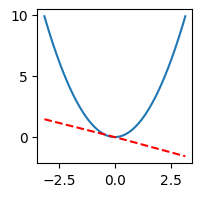

In [306]:
plt.figure(figsize=(2,2))
plt.plot(x_test, y_test)
plt.plot(x_test, y_pred, 'r--')

In [307]:
best_model.summary()

Model: "sequential_2554"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5106 (Dense)          (None, 4)                 8         
                                                                 
 dense_5107 (Dense)          (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [308]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(1,)))
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1), loss='mse', metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=200, 
                    validation_data=(x_test, y_test),
                    batch_size=100)


Epoch 1/200
20/20 [==============================] - 2s 41ms/step - loss: 11.6682 - accuracy: 0.0000e+00 - val_loss: 7.5351 - val_accuracy: 0.0000e+00
Epoch 2/200
20/20 [==============================] - 0s 23ms/step - loss: 4.4819 - accuracy: 0.0000e+00 - val_loss: 2.1213 - val_accuracy: 0.0000e+00
Epoch 3/200
20/20 [==============================] - 0s 24ms/step - loss: 1.1888 - accuracy: 0.0000e+00 - val_loss: 0.4615 - val_accuracy: 0.0000e+00
Epoch 4/200
20/20 [==============================] - 0s 24ms/step - loss: 0.2515 - accuracy: 0.0000e+00 - val_loss: 0.1234 - val_accuracy: 0.0000e+00
Epoch 5/200
20/20 [==============================] - 0s 23ms/step - loss: 0.0895 - accuracy: 0.0000e+00 - val_loss: 0.0741 - val_accuracy: 0.0000e+00
Epoch 6/200
20/20 [==============================] - 0s 23ms/step - loss: 0.0706 - accuracy: 0.0000e+00 - val_loss: 0.0688 - val_accuracy: 0.0000e+00
Epoch 7/200
20/20 [==============================] - 0s 24ms/step - loss: 0.0664 - accuracy: 0.0000

In [309]:
y_pred = model.predict(x_test)

63/63 [==============================] - 1s 7ms/step


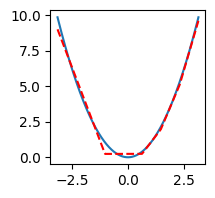

In [310]:
plt.figure(figsize=(2,2))
plt.plot(x_test, y_test)
plt.plot(x_test, y_pred, 'r--')

In [311]:
model.layers[0].weights

[<tf.Variable 'dense_5108/kernel:0' shape=(1, 4) dtype=float32, numpy=array([[ 1.2930138, -2.4516134,  1.7291042,  1.5256413]], dtype=float32)>,
 <tf.Variable 'dense_5108/bias:0' shape=(4,) dtype=float32, numpy=array([-2.9793706, -2.5086136, -1.0798872, -2.2305772], dtype=float32)>]

In [312]:
model.layers[1].weights

[<tf.Variable 'dense_5109/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[1.285867 ],
        [1.6924756],
        [1.1903527],
        [1.0988685]], dtype=float32)>,
 <tf.Variable 'dense_5109/bias:0' shape=(1,) dtype=float32, numpy=array([0.23724401], dtype=float32)>]